# K Nearest Neighbours using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the variables

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feature = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

## Using KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
Knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred = Knn.predict(X_test)

## Predictions and Evaluation

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(Y_test,pred))

[[128  12]
 [ 12 148]]


In [18]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       140
           1       0.93      0.93      0.93       160

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choosing a K value

In [20]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))  ### WHen predicted Value is not correct

Text(0, 0.5, 'Error Rate')

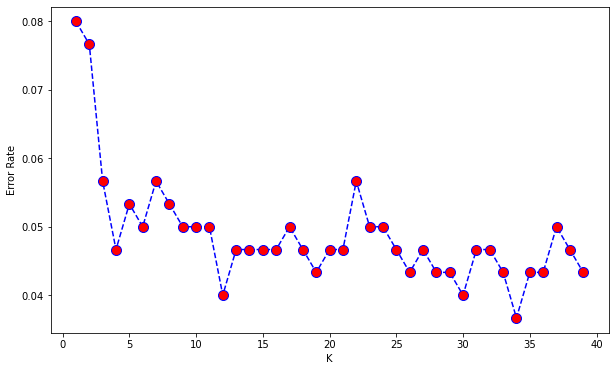

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
### Let's test KNN with the New K values

Knn = KNeighborsClassifier(n_neighbors=12)
Knn.fit(X_train,Y_train)
pred_1 = Knn.predict(X_test)

print(confusion_matrix(pred_1,Y_test))
print(classification_report(pred_1,Y_test))

[[135   7]
 [  5 153]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       142
           1       0.96      0.97      0.96       158

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [24]:
Knn = KNeighborsClassifier(n_neighbors=30)
Knn.fit(X_train,Y_train)
pred_2 = Knn.predict(X_test)

print(confusion_matrix(pred_2,Y_test))
print(classification_report(pred_2,Y_test))

[[134   6]
 [  6 154]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       140
           1       0.96      0.96      0.96       160

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



### We can observe we get better results for K = 10 as the Error rate is low in that point.
### So we can choose that point as our K value